In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load MNIST dataset
(XTrain, YTrain),(XTest,YTest) = mnist.load_data()
print('XTrain Class = ', type(XTrain))
print('YTrain Class = ', type(YTrain))
#Shape of our dataset
print('XTrain shape = ', XTrain.shape)
print('XTest shape = ', XTest.shape)
print('YTrain shape = ', YTrain.shape)
print('YTest shape = ', YTest.shape)
#Number of distinct values of our MNIST target
print('YTrain values = ', np.unique(YTrain))
print('YTest values = ', np.unique(YTest))
#Distribution of classes in our dataset
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain Distribution = ', dict(zip(unique,counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest Distribution = ', dict(zip(unique,counts)))

11490434/11490434 [==============================] - 0s 0us/step
XTrain Class =  <class 'numpy.ndarray'>
YTrain Class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain Distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest Distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
#Data Normalization
XTrain = XTrain.astype('float32')/255
XTest = XTest.astype('float32')/255
#Data Reshaping
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest= XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))
print(XTrain.shape)
print(XTest.shape)

(60000, 784)
(10000, 784)


In [ ]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
#We can summarize our model
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Lets train the model using adam optimizer
AutoencoderModel.compile(optimizer='adam', loss='binary_crossentropy')
history = AutoencoderModel.fit(XTrain, XTrain,
 batch_size=256,
 epochs=100,
 shuffle=True,
 validation_data=(XTest, XTest))
#Here while fitting model we use XTrain + XTrain since it is Autoencoder
#While validation we use XTest and XTest
#Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/100
235/235 [==============================] - 4s 14ms/step - loss: 0.2733 - val_loss: 0.1869
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1700 - val_loss: 0.1526
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1436 - val_loss: 0.1332
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1282 - val_loss: 0.1212
Epoch 5/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1115 - val_loss: 0.1071
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.097

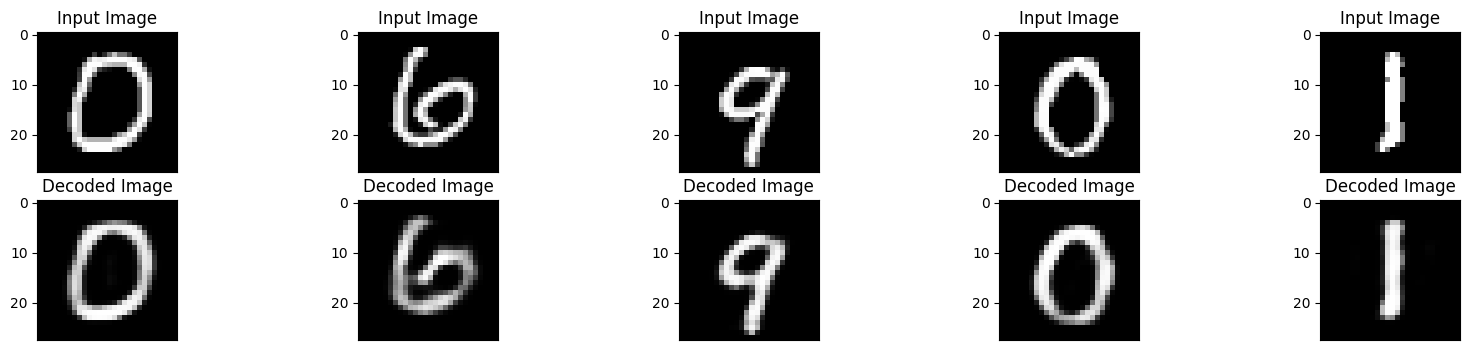

In [ ]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
 ax = plt.subplot(2, n, i+1)
 #input image
 plt.imshow(XTest[i+10].reshape(28,28))
 plt.gray()
 plt.title('Input Image')
 ax.get_xaxis().set_visible(False)
 ax.get_xaxis().set_visible(False)
 ax = plt.subplot(2, n, i+1+n)
 #image decoded by encoder
 plt.imshow(DecodedDigits[i+10].reshape(28,28))
 plt.gray()
 plt.title('Decoded Image')
 ax.get_xaxis().set_visible(False)
 ax.get_xaxis().set_visible(False)
plt.show()